# Mustererkennung Übung 3
### Benjamin Kiesling, Peewee Manzer 

## 1. Aufgabe (5 Punkte):
Laden Sie die Dateien chickwts_testing.csv und chickwts_training.csv aus dem Resources Ordner der
KVVSeite
herunter. Jede Zeile dieser Dateien ist ein Datensatz über ein Huhn mit folgenden Werten: id,
Gewicht, Futterart . (Die Futterart ist von 0 bis 5 indiziert und entspricht: 0=horsebean, 1=linseed,
2=soybean, 3=sunflower, 4=meatmeal, 5=casein)

###### a. (2 Punkte)
Berechnen Sie den Erwartungswert und die Varianz über den Gewichten jeweils für
alle 6 Futterklassen sowie die Apriori Wahrscheinlichkeit
für jede der 6 Futterklassen anhand
der Werte aus chickwts_training.csv .

In [1]:
%matplotlib inline


#Read data from csv file in a panda dataframe

import pandas as pd 
import numpy as np

path_to_chickwts_testing_csv = "./Ressources/chickwts_testing.csv"
path_to_chickwts_training_csv = "./Ressources/chickwts_training.csv"

cw_test_df = pd.read_csv(path_to_chickwts_testing_csv,sep=',', names=["weight","class"],header=None)
cw_training_df = pd.read_csv(path_to_chickwts_training_csv,header=None,names=["id","weight","class"])


In [2]:
# calculate estimate and variance for each class
N =  float(len(cw_training_df))
class_dic = {}
for clsX in range(6):
    clsData = cw_training_df[cw_training_df["class"]==clsX]
    class_dic[clsX] = (clsData["weight"].mean(),
                       clsData["weight"].var(),
                       clsData["weight"].std(),
                       float(clsData.size)/cw_training_df.size)
class_df = pd.DataFrame.from_dict(class_dic,orient="index")
class_df.columns =["estimate","variance","std","prior"]
class_df.index.name = "class"
class_df


,estimate,variance,std,prior
class,,,,
0,165.720000,2080.083265,45.607930,0.140845
1,217.916667,3864.891243,62.168249,0.169014
2,244.642857,3631.943064,60.265604,0.197183
3,325.600000,3248.277966,56.993666,0.169014
4,281.818182,5336.373737,73.050488,0.154930
5,326.933333,4829.588701,69.495242,0.169014


###### b. (1 Punkte)
Plotten Sie die Aposteriori Wahrscheinlichkeitsdichtefunktion
p(Futterklasse | Gewicht)
für alle 6 Futterklassen zusammen in einem Diagramm. Verwenden Sie dabei die Werte aus a)...

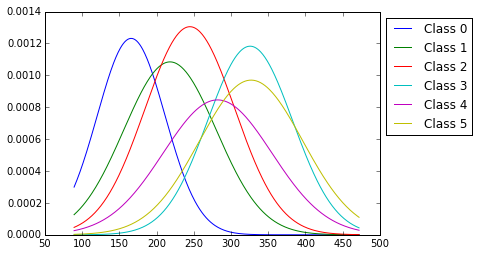

In [3]:
##
import matplotlib.pyplot as plt
from scipy.stats  import norm

cw_data = list(cw_training_df["weight"])
cols = ['b','g','r','c','m','y']
x = np.linspace(np.min(cw_data),
                np.max(cw_data),
                np.max(cw_data)-np.min(cw_data))

for clsX in range(6):
    mean, var, _ , p =  class_df.loc[clsX] 
    sigma = np.sqrt(var)
    
    plt.plot(x,norm.pdf(x,mean,sigma)*p,cols[clsX], label = "Class " + str(clsX))
plt.legend(bbox_to_anchor=(1, 1),loc=0)
plt.show()

###### c. (2 Punkte)
Klassifizieren Sie die Hühner in chickwts_testing.csv mit einem Naive Bayes
Klassifikator anhand ihres Gewichtes in die 6 Futterklassen. Verwenden Sie dabei die Werte bzw.
Wahrscheinlichkeitsdichtefunktionen aus a) und b). Geben Sie die die Konfusionsmatrix und
Klassifikationsgüte aus.

In [4]:
def getGuete(cm ):
    N = sum(sum(x) for x  in cm)
    numCorrect = sum(cm[i][i] for i in range(len(cm)))
    return float(numCorrect)/N

In [5]:
from sklearn.metrics import confusion_matrix

y_true = list(cw_test_df["class"])
y_pred = []

for x in cw_test_df["weight"]:
    tmpPred = -1
    tmpP = 0
    for clsX in range(6):
        mean, var, sigma , p =  class_df.loc[clsX] 
        if( norm.pdf(x,mean,sigma)*p > tmpP): 
            tmpP = norm.pdf(x,mean,sigma)*p
            tmpPred = clsX
    y_pred.append(tmpPred)
    
#for the confusion matrix
#Fill with stuff
cm = confusion_matrix(y_true, y_pred)
print cm,"\n\nAccuracy: "+str(getGuete(cm))


        


[[8 0 2 0 0 0]
 [4 1 6 1 0 0]
 [3 1 7 3 0 0]
 [0 0 1 9 0 2]
 [1 1 4 5 0 0]
 [0 0 4 6 0 2]] 

Accuracy: 0.380281690141


## 2. Aufgabe (5 Punkte):

###### a.  (1 Punkt)
Erzeugen Sie drei Klassen von jeweils 100 zweidimensionalen normalverteilten Punkten
mit folgenden Mittelwerten und Kovarianzmatrizen:
Plotten Sie alle Punkte in einem Diagramm.
<img src="formeln.png">


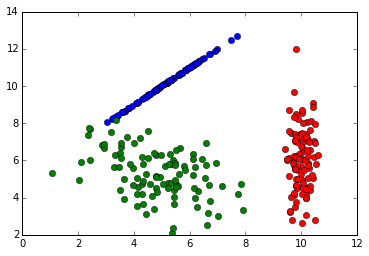

In [6]:
mu1 = np.array([5,10])
mu2 = np.array([5,5])
mu3 = np.array([10,6])

covma1 = np.array([[1,1],[1,1]])
covma2 = np.array([[2,-1],[-1,2]])
covma3 = np.array([[0.1,0],[0,3]])

x1,y1 = np.random.multivariate_normal(mu1,covma1,100).T
x2,y2 = np.random.multivariate_normal(mu2,covma2,100).T
x3,y3 = np.random.multivariate_normal(mu3,covma3,100).T

plt.plot(x1,y1, 'o' + cols[0])
plt.plot(x2,y2, 'o' + cols[1])
plt.plot(x3,y3, 'o' + cols[2])
plt.axis("auto")
plt.show()





###### b. (2 Punkte)
Berechnen Sie die tatsächliche Kovarianzmatrix sowie die dazugehörige
Korrelationsmatrix (Pearson Korrelationkoeffizienten)
für jede der von Ihnen in a) erzeugten
Klassen.

In [7]:
##TODO AUFG b
from scipy.stats import pearsonr

trucov1   = np.cov(x1,y1)
trucov2   = np.cov(x2,y2)
trucov3   = np.cov(x3,y3)

#cov(x,y)/(sigma(x)*sigma(y))
pearscov1 = pearsonr(x1,y1)
pearscov2 = pearsonr(x2,y2)
pearscov3 = pearsonr(x3,y3)


print "Covariancematrix: \n" + str(trucov1) + "\n"+"Pearson: " + str(pearscov1[0])+"\n\n"
print "Covariancematrix: \n" + str(trucov2) + "\n"+"Pearson: " + str(pearscov2[0])+"\n\n"
print "Covariancematrix: \n" + str(trucov3) + "\n"+"Pearson: " + str(pearscov3[0])+"\n\n"

Covariancematrix: 
[[ 1.00714981  1.00714981]
 [ 1.00714981  1.00714981]]
Pearson: 1.0


Covariancematrix: 
[[ 1.89637581 -0.75127446]
 [-0.75127446  1.62532565]]
Pearson: -0.427923585473


Covariancematrix: 
[[ 0.07735548  0.01973938]
 [ 0.01973938  2.79717419]]
Pearson: 0.042435385754




###### c. (2 Punkte)
Generieren sie 1000 zufällige Geraden durch den Ursprung (definiert durch
Einheitsvektoren). Berechnen Sie für jede dieser Geraden $u_i$ den Wert
$$ S(U_i) = \frac{\mbox{Abstand der auf $u_i$ projizierten Mittelwerte}}{\mbox{Summe der auf $u_i$ projizierten Varianzen}}$$
jeweils zwischen den Klassen 1 und 2, 1 und 3 , sowie 2 und 3. Plotten sie die 3 Geraden mit
dem jeweils größten S(ui) zusammen mit den Datenpunkten in einem Diagram.



In [8]:
##TODO AUFG c
from math import pi
#generate a random 2d  unit vector 
def rnd2Dvec():
    phi = np.random.uniform(0,2*pi)
    
    x = np.cos(phi)
    y = np.sin(phi)
    
    return np.array([x,y])

#gets a line and returns dist()
def calcS(x1,y1,x2,y2, u_i,cov1,cov2):
    mean1 = np.array([np.mean(x1),np.mean(y1)])
    mean2 = np.array([np.mean(x2),np.mean(y2)])
    
    var1 =  np.array([np.var(x1),np.var(y1)])
    var2 = np.array([np.var(x2),np.var(y2)])
    
    return float(calcDist(projVec1(mean1,u_i), projVec1(mean2,u_i)))/ (projVar(u_i,cov1) + projVar(u_i,cov2))
    
def projVec1(u, v):
    return np.dot(v, u)

def projVar(u,cov):
    return (np.dot(np.dot(u.T,cov),u))
            
def calcDist(x, y):
    return np.sqrt(np.square( x - y))

    

1,2:[-0.10540465  0.99442941] 1,3: [ 0.93479584 -0.35518549] 2,3: [-0.97131397 -0.23780071]


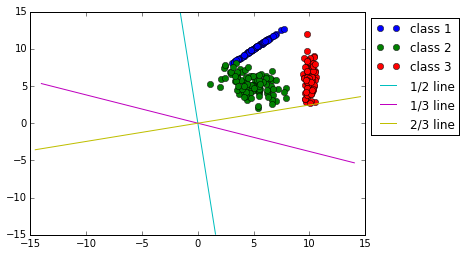

In [9]:
#do that 1000 times and put it in a list
rndLines =  [rnd2Dvec() for x in range(1000)]

def getBestLine(x1,y1,x2,y2,rndLines,cov1,cov2):
    res = []
    for u in rndLines:
        res.append( calcS(x1,y1,x2,y2,u,cov1,cov2))
    return rndLines[np.argmax(res)]

def plotLine(k,best,label,col):
    return plt.plot([best[0]*-k,best[0]*k],[best[1]*-k,best[1]*k],col+'-',label = label)


best_u12 = getBestLine(x1,y1,x2,y2,rndLines,trucov1,trucov2)
best_u13 = getBestLine(x1,y1,x3,y3,rndLines,trucov1,trucov3)
best_u23 = getBestLine(x2,y2,x3,y3,rndLines,trucov2,trucov3)


plt.plot(x1,y1, 'o' + cols[0],label = "class 1" )
plt.plot(x2,y2, 'o' + cols[1],label = "class 2")
plt.plot(x3,y3, 'o' + cols[2],label = "class 3")

print "1,2:"+str(best_u12),"1,3: "+str(best_u13),"2,3: "+str(best_u23)
plt.axis('auto')

plotLine(15,best_u12,"1/2 line",cols[3])
plotLine(15,best_u13,"1/3 line",cols[4])
plotLine(15,best_u23,"2/3 line",cols[5])

plt.legend(bbox_to_anchor=(1, 1),loc = 'best')
plt.show()




